In [ ]:
# Upper Confidence Bound

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\akiper\Desktop\Machine Learning Course\Machine-Learning-A-Z-New\Machine Learning A-Z New\Part 6 - Reinforcement Learning\Section 32 - Upper Confidence Bound (UCB)\Ads_CTR_Optimisation.csv')

In [7]:
import math 
#Implementing UCB
N = 10000 # Total number of users
d = 10 #Number of ads
ads_selected = [] #full list of ads that are selected over the rounds/users
numbers_of_selections = [0] * d #Number of times the ad was selected 
sums_of_rewards = [0] * d #Sum of rewards of the ad up to round N
total_reward = 0 #Total outcomes accumulated over the rounds
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d): 
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt((3/2) * math.log(n + 1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else: 
            upper_bound = 1e400
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1 #Increments by 1 
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

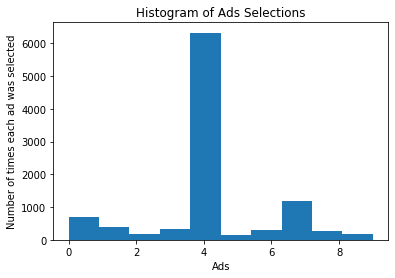

In [8]:
#Visualizing the results
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()